In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as patches
import scipy.stats as stats
from shapely.geometry import Point
from shapely.geometry.polygon import LinearRing,Polygon

# is_in_region(point, bot left grid, top left grid, top right grid, bot right grid )
def is_in_region(x, y, a1, a2, b1, b2, c1, c2, d1, d2):
    point = Point(x,y)
    polygon = Polygon([(a1,a2), (b1,b2), (c1,c2), (d1,d2)])
    return polygon.contains(point)

### Data I/O

### Read in EJ file

In [3]:
# later time step
nn = 350
# step interval
dn = 10

filename=('./output/run5018_EJ_bar_t%3.3d_t%3.3d.dat')%(nn, nn+dn)
x,y,ang,da,Ej,dEj = np.loadtxt(filename,usecols=[0,1,2,3,4,5],unpack=True)

omega_bar = 0.542
omega_spiral = 0.228

CR_bar = 3.2
CR_spiral = 7.0
Sep = 5.0

R_max = 8.

Ej_min = -5.
Ej_max = 0.
dEj_min = -1.5
dEj_max = 1.5

### 1. plot E<sub>J</sub> - &Delta;E<sub>J</sub>, and dissect it into different regions

### E<sub>J</sub> in the bar frame

(-1.5, 1.5)

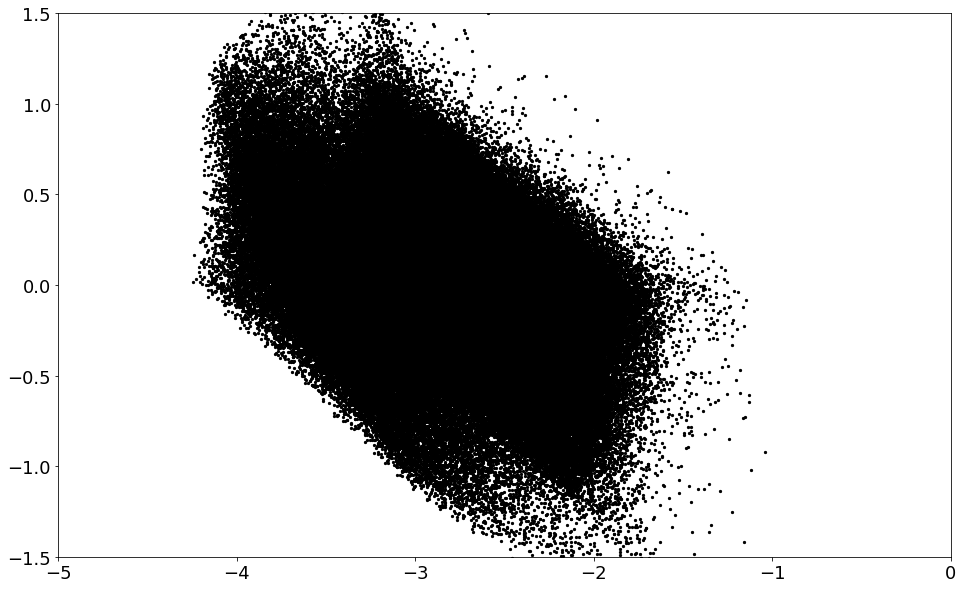

In [4]:
# test results
fig = plt.figure(figsize=(16, 10), dpi=72, facecolor="white")
ax = plt.subplot(111)
ax.cla()
ax.tick_params(direction='out',labelsize=18)

plt.scatter(Ej, dEj, c='k', s=5)
plt.xlim(-5, 0)
plt.ylim(-1.5, 1.5)

(-1.0, 1.0)

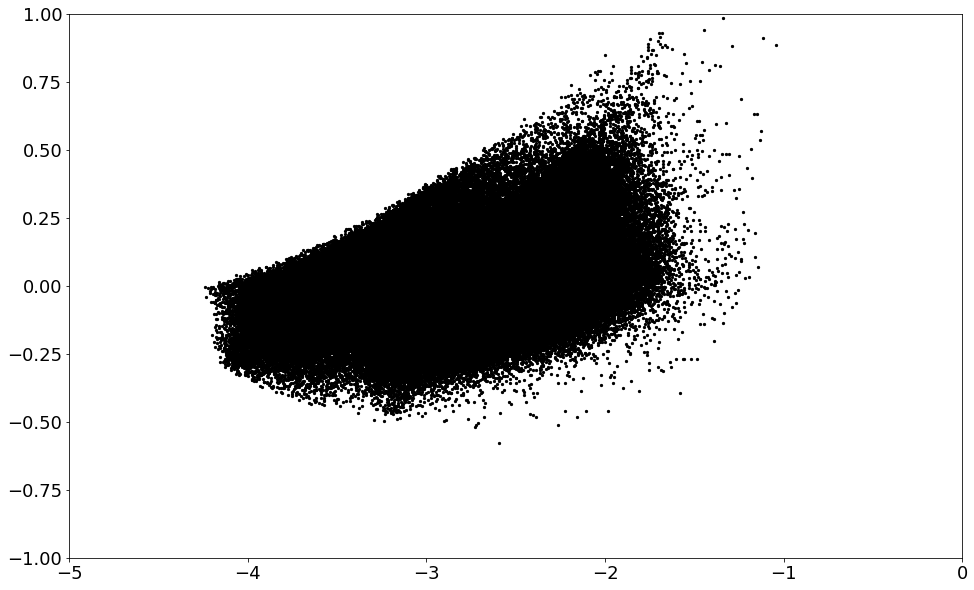

In [5]:
# test results
fig = plt.figure(figsize=(16, 10), dpi=72, facecolor="white")
ax = plt.subplot(111)
ax.cla()
ax.tick_params(direction='out',labelsize=18)

plt.scatter(Ej, dEj/Ej, c='k', s=5)
plt.xlim(-5, 0)
plt.ylim(-1., 1.)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log


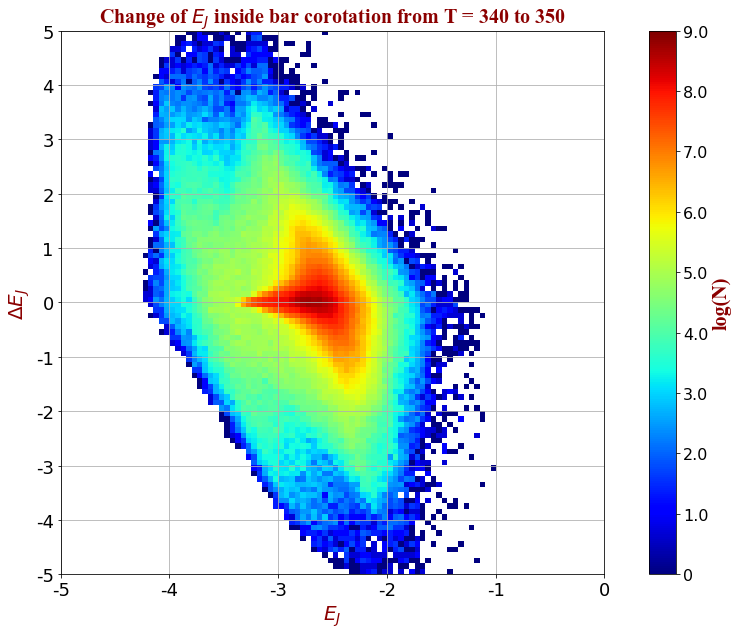

In [6]:
fig = plt.figure(figsize=(16, 10), dpi=72, facecolor="white")
ax = plt.subplot(111)
ax.cla()
ax.tick_params(direction='out',labelsize=18)

# set font
font = {'family' : 'Times New Roman',
        'color'  : 'darkred',
        'weight' : 'normal',
        'size'   : 20,
       }

#extent
extent=(0,1,0,1)
#cmap
cmap=plt.cm.get_cmap('jet')
#normalize colorbar
#norm= matplotlib.colors.Normalize(vmin=0,vmax=5)
#Ej, \delta_{Ej}-plane
H,xedges,yedges = np.histogram2d(dEj,Ej,bins=(100,100),range=([dEj_min, dEj_max],[Ej_min,Ej_max]))
X,Y = np.meshgrid(xedges,yedges)

gci=plt.imshow(np.log(H),interpolation='nearest',extent=extent,origin='low',cmap=cmap)

# plot grid
plt.grid(True)

# plot polygons
#ax.plot(bx, by, linewidth = 2.)
#ax.plot(cr1x, cr1y, linewidth = 2.)
#ax.plot(cr2x, cr2y, linewidth = 2.)
#ax.plot(spx, spy, linewidth = 2.)

#set ticks
ax = plt.gca()
#ax.set_xlabel('X')
ax.set_xticks(np.linspace(0,1,6))
ax.set_xticklabels( ('-5', '-4', '-3', '-2', '-1', '0'))
#ax.set_ylabel('Y')
ax.set_yticks(np.linspace(0,1,11))
ax.set_yticklabels( ('-5', '-4', '-3', '-2', '-1', '0', '1', '2', '3', '4', '5'))

#set labels
ax.set_xlabel('$E_{J}$',fontdict=font)
ax.set_ylabel('$\Delta E_{J}$',fontdict=font)

#colorbar
cbar = fig.colorbar(gci)
cbar.set_label('log(N)',fontdict=font)
cbar.set_ticks(np.linspace(0,9,10))
cbar.set_ticklabels( ('0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0'))
cbar.ax.tick_params(labelsize=16)
plt.clim(0,9)

#title
titleStr='Change of $E_{J}$ inside bar corotation from T = '+str(nn-dn)+' to '+str(nn)
plt.title(titleStr,fontdict=font)

#savefig
figname1='./output/dEj_bar_t'+str(nn-dn)+'_to_'+str(nn)+'_color.png'
plt.savefig(figname1)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log


Text(0.5, 1.0, 'Change of $E_{J}$ inside bar corotation from T = 340 to 350')

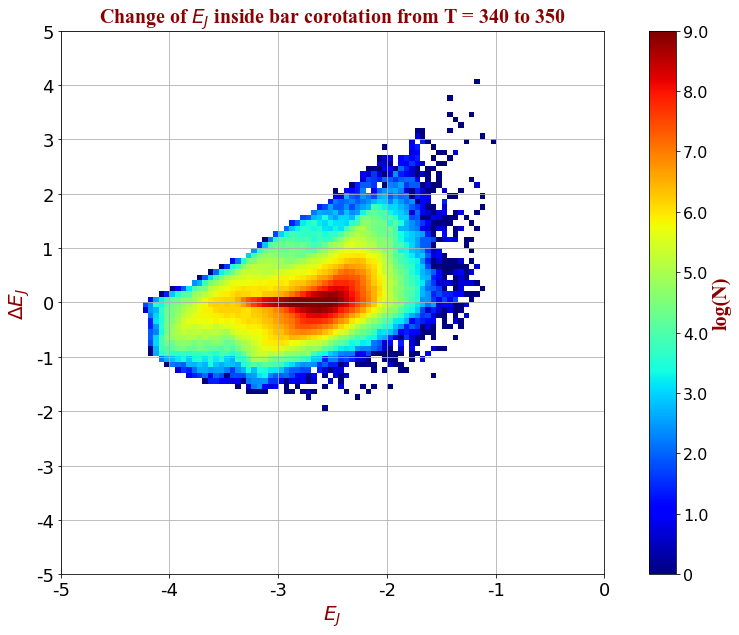

In [7]:
fig = plt.figure(figsize=(16, 10), dpi=72, facecolor="white")
ax = plt.subplot(111)
ax.cla()
ax.tick_params(direction='out',labelsize=18)

# set font
font = {'family' : 'Times New Roman',
        'color'  : 'darkred',
        'weight' : 'normal',
        'size'   : 20,
       }

#extent
extent=(0,1,0,1)
#cmap
cmap=plt.cm.get_cmap('jet')
#normalize colorbar
#norm= matplotlib.colors.Normalize(vmin=0,vmax=5)
#Ej, \delta_{Ej}-plane
H,xedges,yedges = np.histogram2d(dEj/Ej,Ej,bins=(100,100),range=([dEj_min, dEj_max],[Ej_min,Ej_max]))
X,Y = np.meshgrid(xedges,yedges)

gci=plt.imshow(np.log(H),interpolation='nearest',extent=extent,origin='low',cmap=cmap)

# plot grids
plt.grid(True)

# plot polygons
#ax.plot(bx, by, linewidth = 2.)
#ax.plot(cr1x, cr1y, linewidth = 2.)
#ax.plot(cr2x, cr2y, linewidth = 2.)
#ax.plot(spx, spy, linewidth = 2.)

#set ticks
ax = plt.gca()
#ax.set_xlabel('X')
ax.set_xticks(np.linspace(0,1,6))
ax.set_xticklabels( ('-5', '-4', '-3', '-2', '-1', '0'))
#ax.set_ylabel('Y')
ax.set_yticks(np.linspace(0,1,11))
ax.set_yticklabels( ('-5', '-4', '-3', '-2', '-1', '0', '1', '2', '3', '4', '5'))

#set labels
ax.set_xlabel('$E_{J}$',fontdict=font)
ax.set_ylabel('$\Delta E_{J}$',fontdict=font)

#colorbar
cbar = fig.colorbar(gci)
cbar.set_label('log(N)',fontdict=font)
cbar.set_ticks(np.linspace(0,9,10))
cbar.set_ticklabels( ('0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0'))
cbar.ax.tick_params(labelsize=16)
plt.clim(0,9)

#title
titleStr='Change of $E_{J}$ inside bar corotation from T = '+str(nn-dn)+' to '+str(nn)
plt.title(titleStr,fontdict=font)

#savefig
#figname1='./output/dEj_bar_t'+str(nn-dn)+'_to_'+str(nn)+'_color.png'
#plt.savefig(figname1)

### 2. select out the (x, y) indices from E<sub>J</sub> - &Delta;E<sub>J</sub> map.

In [6]:
Ej = np.asarray(Ej2)
dE_J = np.asarray(dEj)
aat = 0
bbt = 0
cct = 0
ddt = 0
Exa = []
Eya = []
Exb = []
Eyb = []
Exc = []
Eyc = []
Exd = []
Eyd = []
aa = []
daa = []
ab = []
dab = []
ac = []
dac = []
ad = []
dad = []
Ea = []
dEa = []
Eb = []
dEb = []
Ec = []
dEc = []
Ed = []
dEd = []

for i in range(len(x2)):
    if is_in_region(Ej[i], dE_J[i], bar_a1, bar_a2, bar_b1, bar_b2, bar_c1, bar_c2, bar_d1, bar_d2):
        Exa.append(x2[i])
        Eya.append(y2[i])
        aa.append(ang2[i])
        daa.append(da[i])
        Ea.append(Ej[i])
        dEa.append(dE_J[i])
        aat += 1
    elif is_in_region(Ej[i], dE_J[i], cr1_a1, cr1_a2, cr1_b1, cr1_b2, cr1_c1, cr1_c2, cr1_d1, cr1_d2):
        Exb.append(x2[i])
        Eyb.append(y2[i])
        ab.append(ang2[i])
        dab.append(da[i])
        Eb.append(Ej[i])
        dEb.append(dE_J[i])
        bbt += 1
    elif is_in_region(Ej[i], dE_J[i], cr2_a1, cr2_a2, cr2_b1, cr2_b2, cr2_c1, cr2_c2, cr2_d1, cr2_d2):
        Exc.append(x2[i])
        Eyc.append(y2[i])
        ac.append(ang2[i])
        dac.append(da[i])
        Ec.append(Ej[i])
        dEc.append(dE_J[i])
        cct += 1
    elif is_in_region(Ej[i], dE_J[i], sp_a1, sp_a2, sp_b1, sp_b2, sp_c1, sp_c2, sp_d1, sp_d2):
        Exd.append(x2[i])
        Eyd.append(y2[i])
        ad.append(ang2[i])
        dad.append(da[i])
        Ed.append(Ej[i])
        dEd.append(dE_J[i])
        ddt += 1
    else:
        continue

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: RuntimeWarning: divide by zero encountered in log
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: divide by zero encountered in log


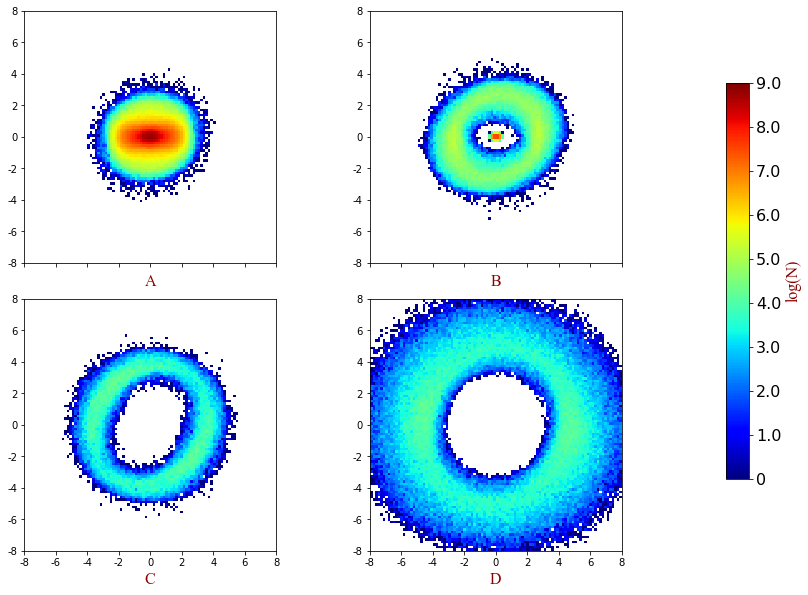

In [7]:
fig = plt.figure(figsize=(16, 10), dpi=72, facecolor="white")
ax1 = fig.add_axes([0.1, 0.5, 0.4, 0.35])
ax2 = fig.add_axes([0.4, 0.5, 0.4, 0.35])
ax3 = fig.add_axes([0.1, 0.1, 0.4, 0.35])
ax4 = fig.add_axes([0.4, 0.1, 0.4, 0.35])

# set font
font = {'family' : 'Times New Roman',
        'color'  : 'darkred',
        'weight' : 'normal',
        'size'   : 16,
       }

#extent
extent=(0,1,0,1)
#cmap
cmap=plt.cm.get_cmap('jet')
#normalize colorbar
norm= matplotlib.colors.Normalize(vmin=0,vmax=9.)

#PLOT 1
H1,xedges1,yedges1 = np.histogram2d(Eya,Exa,bins=(100,100),range=([-8.,8.],[-8.,8.]))

gci=ax1.imshow(np.log(H1),interpolation='nearest',extent=extent,origin='low',cmap=cmap,norm=norm)

#ax1.add_patch(plt.Circle((0,0),CR_bar,color='black'))

#set ticks
#ax1.set_xlabel('X')
ax1.set_xticks(np.linspace(0,1,9))
ax1.set_xticklabels( (''))
#ax1.set_ylabel('Y')
ax1.set_yticks(np.linspace(0,1,9))
ax1.set_yticklabels(('-8', '-6', '-4', '-2', '0',  '2',  '4',  '6', '8'))

#set labels
ax1.set_xlabel('A',fontdict=font)
#ax1.set_ylabel('Y',fontdict=font)

########################

#PLOT 2
H2,xedges2,yedges2 = np.histogram2d(Eyb,Exb,bins=(100,100),range=([-8.,8.],[-8.,8.]))

ax2.imshow(np.log(H2),interpolation='nearest',extent=extent,origin='low',cmap=cmap,norm=norm)

#set ticks
#ax2.set_xlabel('X')
ax2.set_xticks(np.linspace(0,1,9))
ax2.set_xticklabels( (''))
#ax2.set_ylabel('Y')
ax2.set_yticks(np.linspace(0,1,9))
ax2.set_yticklabels(('-8', '-6', '-4', '-2', '0',  '2',  '4',  '6', '8'))

#set labels
ax2.set_xlabel('B',fontdict=font)
#ax2.set_ylabel('')

########################

#PLOT 3
H3,xedges3,yedges3 = np.histogram2d(Eyc,Exc,bins=(100,100),range=([-8.,8.],[-8.,8.]))

ax3.imshow(np.log(H3),interpolation='nearest',extent=extent,origin='low',cmap=cmap,norm=norm)

#set ticks
#ax3.set_xlabel('X')
ax3.set_xticks(np.linspace(0,1,9))
ax3.set_xticklabels( ('-8', '-6', '-4', '-2', '0',  '2',  '4',  '6', '8'))
#ax3.set_ylabel('Y')
ax3.set_yticks(np.linspace(0,1,9))
ax3.set_yticklabels(('-8', '-6', '-4', '-2', '0',  '2',  '4',  '6', '8'))

#set labels
ax3.set_xlabel('C',fontdict=font)
#ax3.set_ylabel('')

########################

#PLOT 4
H4,xedges4,yedges4 = np.histogram2d(Eyd,Exd,bins=(100,100),range=([-8.,8.],[-8.,8.]))

ax4.imshow(np.log(H4),interpolation='nearest',extent=extent,origin='low',cmap=cmap,norm=norm)

#set ticks
#ax4.set_xlabel('X')
ax4.set_xticks(np.linspace(0,1,9))
ax4.set_xticklabels( ('-8', '-6', '-4', '-2', '0', '2',  '4',  '6', '8'))
#ax4.set_ylabel('Y')
ax4.set_yticks(np.linspace(0,1,9))
ax4.set_yticklabels(('-8', '-6', '-4', '-2', '0',  '2',  '4',  '6', '8'))

#set labels
ax4.set_xlabel('D',fontdict=font)

#colorbar
cbar_ax = fig.add_axes([0.8, 0.20, 0.02, 0.55])
cbar = fig.colorbar(gci, cax=cbar_ax)
cbar.set_label('log(N)',fontdict=font)
cbar.set_ticks(np.linspace(0,9,10))
cbar.set_ticklabels( ('0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0'))
cbar.ax.tick_params(labelsize=16)
#plt.clim(0,8)

#savefig
figname2='./output/dissect/dEj_sect_t'+str(nn-dn)+'to'+str(nn)+'.png'
plt.savefig(figname2)

### angular momentum

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: divide by zero encountered in log
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:84: RuntimeWarning: divide by zero encountered in log


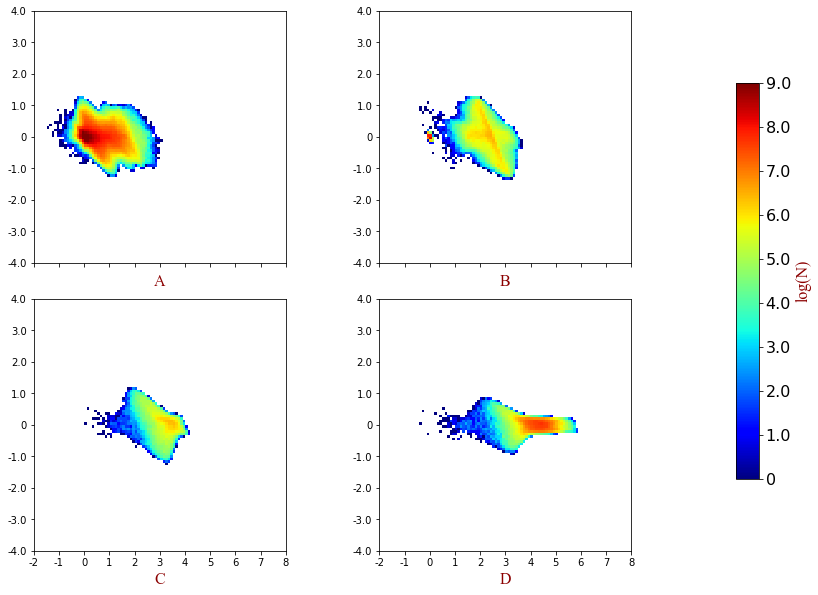

In [8]:
fig = plt.figure(figsize=(16, 10), dpi=72, facecolor="white")
ax1 = fig.add_axes([0.1, 0.5, 0.4, 0.35])
ax2 = fig.add_axes([0.4, 0.5, 0.4, 0.35])
ax3 = fig.add_axes([0.1, 0.1, 0.4, 0.35])
ax4 = fig.add_axes([0.4, 0.1, 0.4, 0.35])

# set font
font = {'family' : 'Times New Roman',
        'color'  : 'darkred',
        'weight' : 'normal',
        'size'   : 16,
       }

#extent
extent=(0,1,0,1)
#cmap
cmap=plt.cm.get_cmap('jet')
#normalize colorbar
norm= matplotlib.colors.Normalize(vmin=0,vmax=9.)

#PLOT 1
H1,xedges1,yedges1 = np.histogram2d(daa,aa,bins=(100,100),range=([-4.,4.],[-2.,8.]))

gci=ax1.imshow(np.log(H1),interpolation='nearest',extent=extent,origin='low',cmap=cmap,norm=norm)

#ax1.add_patch(plt.Circle((0,0),CR_bar,color='black'))

#set ticks
#ax.set_xlabel('X')
ax1.set_xticks(np.linspace(0,1,11))
ax1.set_xticklabels( (''))
#ax1.set_ylabel('Y')
ax1.set_yticks(np.linspace(0,1,9))
ax1.set_yticklabels( ('-4.0', '-3.0', '-2.0', '-1.0', '0', '1.0', '2.0', '3.0', '4.0'))

#set labels
ax1.set_xlabel('A',fontdict=font)
#ax1.set_ylabel('Y',fontdict=font)

########################

#PLOT 2
H2,xedges2,yedges2 = np.histogram2d(dab,ab,bins=(100,100),range=([-4.,4.],[-2.,8.]))

ax2.imshow(np.log(H2),interpolation='nearest',extent=extent,origin='low',cmap=cmap,norm=norm)

#set ticks
#set ticks
#ax.set_xlabel('X')
ax2.set_xticks(np.linspace(0,1,11))
ax2.set_xticklabels( (''))
#ax1.set_ylabel('Y')
ax2.set_yticks(np.linspace(0,1,9))
ax2.set_yticklabels( ('-4.0', '-3.0', '-2.0', '-1.0', '0', '1.0', '2.0', '3.0', '4.0'))

#set labels
ax2.set_xlabel('B',fontdict=font)
#ax2.set_ylabel('')

########################

#PLOT 3
H3,xedges3,yedges3 = np.histogram2d(dac,ac,bins=(100,100),range=([-4.,4.],[-2.,8.]))

ax3.imshow(np.log(H3),interpolation='nearest',extent=extent,origin='low',cmap=cmap,norm=norm)

#set ticks
#ax.set_xlabel('X')
ax3.set_xticks(np.linspace(0,1,11))
ax3.set_xticklabels( ('-2', '-1', '0', '1', '2', '3', '4', '5', '6', '7', '8'))
#ax3.set_ylabel('Y')
ax3.set_yticks(np.linspace(0,1,9))
ax3.set_yticklabels( ('-4.0', '-3.0', '-2.0', '-1.0', '0', '1.0', '2.0', '3.0', '4.0'))

#set labels
ax3.set_xlabel('C',fontdict=font)
#ax3.set_ylabel('')

########################

#PLOT 4
H4,xedges4,yedges4 = np.histogram2d(dad,ad,bins=(100,100),range=([-4.,4.],[-2.,8.]))

ax4.imshow(np.log(H4),interpolation='nearest',extent=extent,origin='low',cmap=cmap,norm=norm)

#set ticks
#ax.set_xlabel('X')
ax4.set_xticks(np.linspace(0,1,11))
ax4.set_xticklabels( ('-2', '-1', '0', '1', '2', '3', '4', '5', '6', '7', '8'))
#ax4.set_ylabel('Y')
ax4.set_yticks(np.linspace(0,1,9))
ax4.set_yticklabels( ('-4.0', '-3.0', '-2.0', '-1.0', '0', '1.0', '2.0', '3.0', '4.0'))

#set labels
ax4.set_xlabel('D',fontdict=font)

#colorbar
cbar_ax = fig.add_axes([0.8, 0.20, 0.02, 0.55])
cbar = fig.colorbar(gci, cax=cbar_ax)
cbar.set_label('log(N)',fontdict=font)
cbar.set_ticks(np.linspace(0,9,10))
cbar.set_ticklabels( ('0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0'))
cbar.ax.tick_params(labelsize=16)
#plt.clim(0,8)

#savefig
figname3='./output/dissect/da_sect_t'+str(nn-dn)+'to'+str(nn)+'.png'
plt.savefig(figname3)

/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


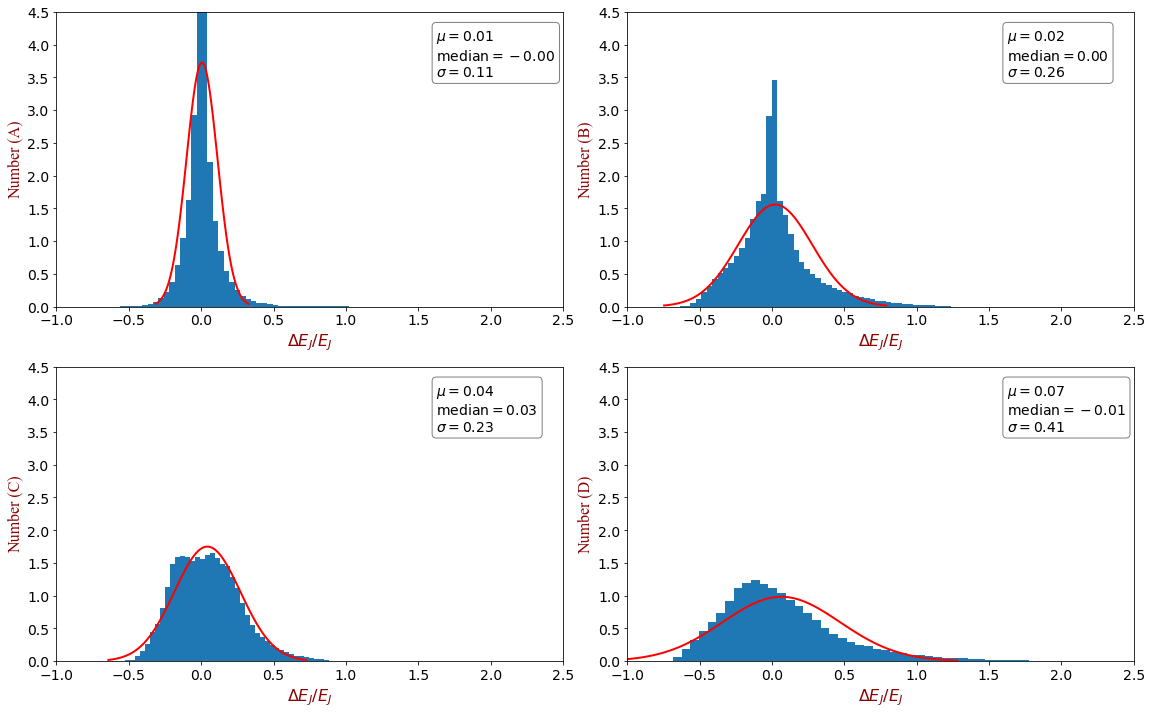

In [9]:
# set font
font = {'family' : 'Times New Roman',
        'color'  : 'darkred',
        'weight' : 'normal',
        'size'   : 16,
       }

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='white', alpha=0.5)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10), dpi=72, facecolor="white")
ax1, ax2, ax3, ax4 = axes.flatten()

n_bins = 50

# Estimation
ax1.hist(np.divide(dEa, Ea), n_bins, normed=1, histtype='bar')
mu1 = np.average(np.divide(dEa, Ea))
md1 = np.median(np.divide(dEa, Ea))
std1 = np.std(np.divide(dEa, Ea))
x_axis1 = np.linspace(mu1 - 3*std1, mu1 + 3*std1, 100)
ax1.plot(x_axis1, stats.norm.pdf(x_axis1, mu1, std1), linewidth=2., color='red')
# place a text box in upper left in axes coords
textstr = '\n'.join((
    r'$\mu=%.2f$' % (mu1, ),
    r'$\mathrm{median}=%.2f$' % (md1, ),
    r'$\sigma=%.2f$' % (std1, )))
ax1.text(0.75, 0.95, textstr, transform=ax1.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
ax1.set_xlim(-1.0, 2.5)
ax1.set_ylim(0, 4.5)
ax1.set_xlabel('$\Delta E_J / E_J$', fontdict=font)
ax1.set_ylabel('Number (A)', fontdict=font)
ax1.tick_params(axis='both', which='major', labelsize=14)

# Estimation
ax2.hist(np.divide(dEb, Eb), n_bins, normed=1, histtype='bar')
mu2 = np.average(np.divide(dEb, Eb))
md2 = np.median(np.divide(dEb, Eb))
std2 = np.std(np.divide(dEb, Eb))
x_axis2 = np.linspace(mu2 - 3*std2, mu2 + 3*std2, 100)
ax2.plot(x_axis2, stats.norm.pdf(x_axis2, mu2, std2), linewidth=2., color='red')
# place a text box in upper left in axes coords
textstr = '\n'.join((
    r'$\mu=%.2f$' % (mu2, ),
    r'$\mathrm{median}=%.2f$' % (md2, ),
    r'$\sigma=%.2f$' % (std2, )))
ax2.text(0.75, 0.95, textstr, transform=ax2.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
ax2.set_xlim(-1.0, 2.5)
ax2.set_ylim(0, 4.5)
ax2.set_xlabel('$\Delta E_J / E_J$', fontdict=font)
ax2.set_ylabel('Number (B)', fontdict=font)
ax2.tick_params(axis='both', which='major', labelsize=14)

# Estimation
ax3.hist(np.divide(dEc, Ec), n_bins, normed=1, histtype='bar')
mu3 = np.average(np.divide(dEc, Ec))
md3 = np.median(np.divide(dEc, Ec))
std3 = np.std(np.divide(dEc, Ec))
x_axis3 = np.linspace(mu3 - 3*std3, mu3 + 3*std3, 100)
ax3.plot(x_axis3, stats.norm.pdf(x_axis3, mu3, std3), linewidth=2., color='red')
# place a text box in upper left in axes coords
textstr = '\n'.join((
    r'$\mu=%.2f$' % (mu3, ),
    r'$\mathrm{median}=%.2f$' % (md3, ),
    r'$\sigma=%.2f$' % (std3, )))
ax3.text(0.75, 0.95, textstr, transform=ax3.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
ax3.set_xlim(-1.0, 2.5)
ax3.set_ylim(0, 4.5)
ax3.set_xlabel('$\Delta E_J / E_J$', fontdict=font)
ax3.set_ylabel('Number (C)', fontdict=font)
ax3.tick_params(axis='both', which='major', labelsize=14)

# Estimation
ax4.hist(np.divide(dEd, Ed), n_bins, normed=1, histtype='bar')
mu4 = np.average(np.divide(dEd, Ed))
md4 = np.median(np.divide(dEd, Ed))
std4 = np.std(np.divide(dEd, Ed))
x_axis4 = np.linspace(mu4 - 3*std4, mu4 + 3*std4, 100)
ax4.plot(x_axis4, stats.norm.pdf(x_axis4, mu4, std4), linewidth=2., color='red')
# place a text box in upper left in axes coords
textstr = '\n'.join((
    r'$\mu=%.2f$' % (mu4, ),
    r'$\mathrm{median}=%.2f$' % (md4, ),
    r'$\sigma=%.2f$' % (std4, )))
ax4.text(0.75, 0.95, textstr, transform=ax4.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
ax4.set_xlim(-1.0, 2.5)
ax4.set_ylim(0, 4.5)
ax4.set_xlabel('$\Delta E_J / E_J$', fontdict=font)
ax4.set_ylabel('Number (D)', fontdict=font)
ax4.tick_params(axis='both', which='major', labelsize=14)

fig.tight_layout()

#savefig
figname4='./output/dissect/dEj_Ej_sect_t'+str(nn-dn)+'_to_'+str(nn)+'.png'
plt.savefig(figname4)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/usr/local/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/usr/local/anaconda

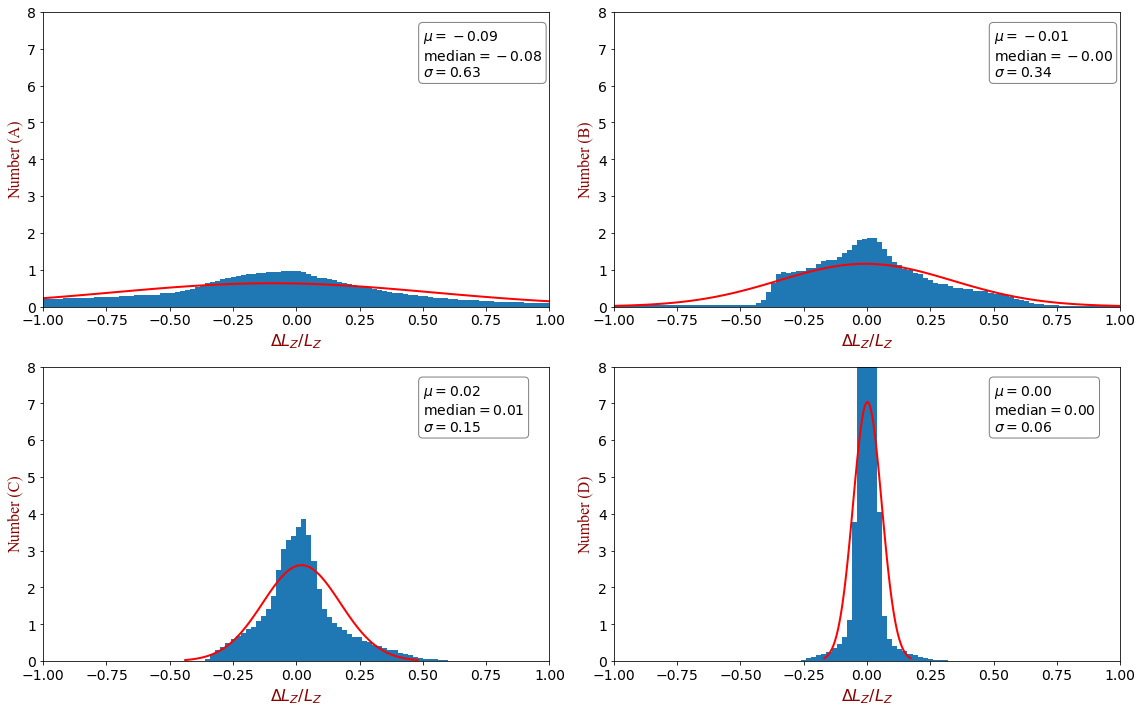

In [10]:
# set font
font = {'family' : 'Times New Roman',
        'color'  : 'darkred',
        'weight' : 'normal',
        'size'   : 16,
       }

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10), dpi=72, facecolor="white")
ax1, ax2, ax3, ax4 = axes.flatten()

n_bins = 100

ax1.hist(np.divide(daa,aa), n_bins*2, normed=1, range=(-2.0, 2.0), histtype='bar')
# std, dev in range < 2.0
div1 = np.divide(daa,aa)
tmp1 = div1[np.abs(div1) < 2.0]
mu1 = np.average(tmp1)
md1 = np.median(tmp1)
std1 = np.std(tmp1)
#print(mu1, std1)
x_axis1 = np.linspace(mu1 - 3*std1, mu1 + 3*std1, 100)
ax1.plot(x_axis1, stats.norm.pdf(x_axis1, mu1, std1), linewidth=2., color='red')
# place a text box in upper left in axes coords
textstr = '\n'.join((
    r'$\mu=%.2f$' % (mu1, ),
    r'$\mathrm{median}=%.2f$' % (md1, ),
    r'$\sigma=%.2f$' % (std1, )))
ax1.text(0.75, 0.95, textstr, transform=ax1.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
ax1.set_xlim(-1.0, 1.0)
ax1.set_ylim(0, 8.0)
ax1.set_xlabel('$\Delta L_Z / L_Z$', fontdict=font)
ax1.set_ylabel('Number (A)', fontdict=font)
ax1.tick_params(axis='both', which='major', labelsize=14)

ax2.hist(np.divide(dab,ab), n_bins*2, normed=1, range=(-2.0, 2.0), histtype='bar')
# std, dev in range < 2.0
div2 = np.divide(dab,ab)
tmp2 = div2[np.abs(div2) < 2.0]
mu2 = np.average(tmp2)
md2 = np.median(tmp2)
std2 = np.std(tmp2)
#print(mu2, std2)
x_axis2 = np.linspace(mu2 - 3*std2, mu2 + 3*std2, 100)
ax2.plot(x_axis2, stats.norm.pdf(x_axis2, mu2, std2), linewidth=2., color='red')
# place a text box in upper left in axes coords
textstr = '\n'.join((
    r'$\mu=%.2f$' % (mu2, ),
    r'$\mathrm{median}=%.2f$' % (md2, ),
    r'$\sigma=%.2f$' % (std2, )))
ax2.text(0.75, 0.95, textstr, transform=ax2.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
ax2.set_xlim(-1.0, 1.0)
ax2.set_ylim(0, 8.0)
ax2.set_xlabel('$\Delta L_Z / L_Z$', fontdict=font)
ax2.set_ylabel('Number (B)', fontdict=font)
ax2.tick_params(axis='both', which='major', labelsize=14)


ax3.hist(np.divide(dac,ac), n_bins, normed=1, range=(-1.0, 1.0), histtype='bar')
mu3 = np.average(np.divide(dac, ac))
md3 = np.median(np.divide(dac, ac))
std3 = np.std(np.divide(dac, ac))
x_axis3 = np.linspace(mu3 - 3*std3, mu3 + 3*std3, 100)
ax3.plot(x_axis3, stats.norm.pdf(x_axis3, mu3, std3), linewidth=2., color='red')
# place a text box in upper left in axes coords
textstr = '\n'.join((
    r'$\mu=%.2f$' % (mu3, ),
    r'$\mathrm{median}=%.2f$' % (md3, ),
    r'$\sigma=%.2f$' % (std3, )))
ax3.text(0.75, 0.95, textstr, transform=ax3.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
ax3.set_xlim(-1.0, 1.0)
ax3.set_ylim(0, 8.0)
ax3.set_xlabel('$\Delta L_Z / L_Z$', fontdict=font)
ax3.set_ylabel('Number (C)', fontdict=font)
ax3.tick_params(axis='both', which='major', labelsize=14)

ax4.hist(np.divide(dad,ad), n_bins, normed=1, range=(-1.0, 1.0), histtype='bar')
mu4 = np.average(np.divide(dad, ad))
md4 = np.median(np.divide(dad, ad))
std4 = np.std(np.divide(dad, ad))
x_axis4 = np.linspace(mu4 - 3*std4, mu4 + 3*std4, 100)
ax4.plot(x_axis4, stats.norm.pdf(x_axis4, mu4, std4), linewidth=2., color='red')
# place a text box in upper left in axes coords
textstr = '\n'.join((
    r'$\mu=%.2f$' % (mu4, ),
    r'$\mathrm{median}=%.2f$' % (md4, ),
    r'$\sigma=%.2f$' % (std4, )))
ax4.text(0.75, 0.95, textstr, transform=ax4.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
ax4.set_xlim(-1.0, 1.0)
ax4.set_ylim(0, 8.0)
ax4.set_xlabel('$\Delta L_Z / L_Z$', fontdict=font)
ax4.set_ylabel('Number (D)', fontdict=font)
ax4.tick_params(axis='both', which='major', labelsize=14)

fig.tight_layout()

#savefig
figname5='./output/dissect/da_a_sect_t'+str(nn-dn)+'_to_'+str(nn)+'.png'
plt.savefig(figname5)